## Display Training Curve

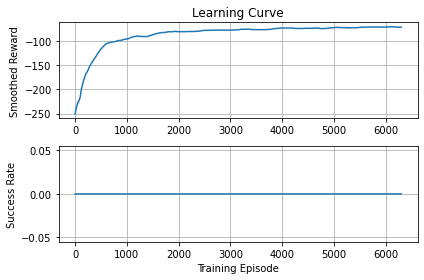

In [1]:
import numpy as np
from matplotlib import pyplot as plt
reward = np.load('reward_log.npy')

def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

    
def moving_sum(y, window=100):
    c = y.cumsum()
    c[window:] = c[window:] - c[:-window]
    return c/float(window)

def success_filter(r, threshold=4):
    success_list=np.zeros(len(r))
    success_list[np.where(r>threshold)]=1  # reward larger than threshold indicates successful grasping
    return success_list
    
success_list=np.zeros(len(reward))
success_list[np.where(reward>4)]=1  # reward larger than 0 indicates successful grasping

early_stop=400000

fig, axs = plt.subplots(2)
# plot smoothed reward curve
axs[0].plot(smooth(reward[:early_stop], radius=100))
axs[0].set_title('Learning Curve')
axs[0].set_ylabel('Smoothed Reward')
axs[0].grid()

axs[1].plot(moving_sum(success_filter(reward)[:early_stop]))
axs[1].set_xlabel('Training Episode')
axs[1].set_ylabel('Success Rate')
axs[1].grid()
plt.tight_layout()
plt.savefig('training.pdf')
plt.show()


## Comparision with different reward functions

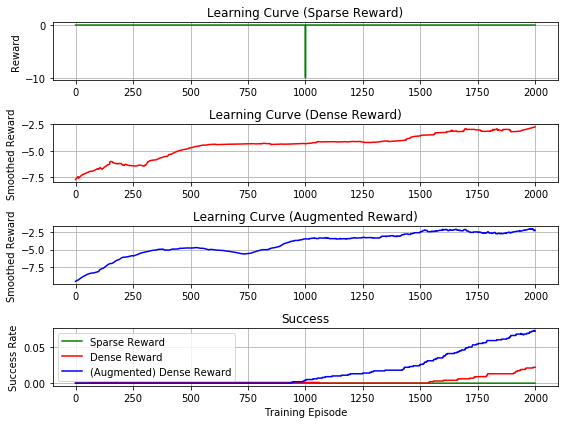

In [81]:
import numpy as np
from matplotlib import pyplot as plt
file='./data/'
reward_sparse = np.load(file+'reward_log_sparse.npy')
reward_dense = np.load(file+'reward_log_dense.npy')
reward_dense_aug = np.load(file+'reward_log_dense_aug.npy')

def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

    
def moving_sum(y, window=1000):
    c = y.cumsum()
    c[window:] = c[window:] - c[:-window]
    return c/float(window)

def success_filter(r, threshold=4):
    success_list=np.zeros(len(r))
    success_list[np.where(r>threshold)]=1  # reward larger than threshold indicates successful grasping
    return success_list

fig, axs = plt.subplots(4, figsize=(8,6))
axs[0].plot(reward_sparse, c='g', label='Sparse Reward')
axs[0].set_title('Learning Curve (Sparse Reward)')
axs[0].set_ylabel('Reward')
axs[0].grid()

axs[1].plot(smooth(reward_dense), c='r', label='Dense Reward')
axs[1].set_title('Learning Curve (Dense Reward)')
axs[1].set_ylabel('Smoothed Reward')
axs[1].grid()

axs[2].plot(smooth(reward_dense_aug), c='b', label='(Augmented) Dense Reward')
axs[2].set_title('Learning Curve (Augmented Reward)')
axs[2].set_ylabel('Smoothed Reward')
axs[2].grid()

axs[3].plot(moving_sum(success_filter(reward_sparse)), c='g', label='Sparse Reward')
axs[3].plot(moving_sum(success_filter(reward_dense)), c='r', label='Dense Reward')
axs[3].plot(moving_sum(success_filter(reward_dense_aug)), c='b', label='(Augmented) Dense Reward')
axs[3].set_title('Success')
axs[3].set_xlabel('Training Episode')
axs[3].set_ylabel('Success Rate')
axs[3].grid()
axs[3].legend()

plt.tight_layout()
plt.savefig('comparison.png')
plt.show()
